<a href="https://colab.research.google.com/github/Ssurf777/Generative3D_Face_VAE/blob/main/VAE_face_emotional_logging_wandb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install POT
!pip install open3d

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 111.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.3 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  

In [ ]:
# prompt: wandbのpip install
!pip install wandb

# VAE

In [ ]:
import requests
import os

def download_file(url, local_filename):
    """Downloads a file from a URL to a local file."""
    print(f"Downloading {url}...")
    try:
        with requests.get(url, stream=True) as r:
            r.raise_for_status()
            with open(local_filename, 'wb') as f:
                for chunk in r.iter_content(chunk_size=4096):  # Smaller chunk size
                    f.write(chunk)
        print(f"{local_filename} downloaded successfully.")
    except requests.exceptions.RequestException as e:
        print(f"Failed to download {local_filename}: {e}")

# URLs for downloading
urls = {
    "utils.py": "https://raw.githubusercontent.com/Ssurf777/Generative3D_Face_VAE/refs/heads/main/lib/utils.py",
    "ply_dataloader.py": "https://raw.githubusercontent.com/Ssurf777/Generative3D_Face_VAE/refs/heads/main/lib/ply_dataloader.py",
    "sampling.py": "https://raw.githubusercontent.com/Ssurf777/Generative3D_Face_VAE/refs/heads/main/lib/sampling.py",
    "ISAB_VQVAE.py": "https://raw.githubusercontent.com/Ssurf777/Generative3D_Face_VAE/refs/heads/main/lib/ISAB_VQVAE.py",
    "ChamferDis.py": "https://raw.githubusercontent.com/Ssurf777/Generative3D_Face_VAE/refs/heads/main/lib/ChamferDis.py",
    "EarthMoversDis.py": "https://raw.githubusercontent.com/Ssurf777/Generative3D_Face_VAE/refs/heads/main/lib/EarthMoversDis.py",
    "visualize_loss.py": "https://raw.githubusercontent.com/Ssurf777/Generative3D_Face_VAE/refs/heads/main/lib/visualize_loss.py",
    "ISAB.py": "https://raw.githubusercontent.com/Ssurf777/Generative3D_Face_VAE/refs/heads/main/lib/ISAB.py",
}

# Download each file
for local_filename, url in urls.items():
    download_file(url, local_filename)



utils.py downloaded successfully.
ply_dataloader.py downloaded successfully.
sampling.py downloaded successfully.
ISAB_VQVAE.py downloaded successfully.
ChamferDis.py downloaded successfully.
EarthMoversDis.py downloaded successfully.
visualize_loss.py downloaded successfully.
ISAB.py downloaded successfully.


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch
import wandb
import torch.nn.functional as F
import torch.optim as optim
import numpy as np


# Import downloaded modules
import utils
import sampling
import ISAB_VQVAE
import ISAB
import ply_dataloader
import ChamferDis
import EarthMoversDis
import visualize_loss

from utils import get_available_memory
from sampling import PointSampler
from ISAB import MultiheadAttentionBlock, ISAB
from ISAB_VQVAE import ISAB_VQVAE
from ply_dataloader import prepare_data_from_ply
from ChamferDis import chamfer_distance
from EarthMoversDis import emd_distance
from visualize_loss import visualize_loss

available_memory_gb = get_available_memory()
print(f"Available memory: {available_memory_gb:.2f} GB")

Available memory: 10.63 GB


In [ ]:
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: shimokame777 (shimokame777-personal) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [ ]:
# Initialize wandb
wandb.init(project="Face_emotional_using_VAE", entity="") # Replace with your project name and username

# DataLoader

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
num_points =5000
# データ準備
file_names = []
for i in range(10, 171, 10):
  file_names.append(f"/content/drive/MyDrive/Emotional_fase_datasets/mouth_open/mouth_open.{i:06}.ply")

data_loader = prepare_data_from_ply(file_names, num_points=num_points, device=device)
print(len(data_loader))

# VAEモデル構築
vae = ISAB_VQVAE(num_points=5000, dim_input=3, dim_hidden=128, num_heads=4, num_inds=32,
                 embedding_dim=3, num_embeddings=32).to(device)
# W&B watch
wandb.watch(vae, log="all", log_freq=100)

optimizer = optim.Adam(vae.parameters(), lr=1e-3)

17


# Datasets logging to WandB

In [ ]:
import wandb
import numpy as np

# Log the dataset as a WandB artifact
artifact = wandb.Artifact('face_dataset', type='dataset')

# Example: save data to a .npy file
dataset_filepath = "face_dataset.npy"
all_data = []

for batch in data_loader:
    batch_cpu = [tensor.cpu().numpy() for tensor in batch]
    all_data.extend(batch_cpu)

np.save(dataset_filepath, np.array(all_data))

# Add the saved data file to the artifact
artifact.add_file(dataset_filepath)

# Log the artifact
wandb.log_artifact(artifact)

<Artifact face_dataset>

In [ ]:


for batch in data_loader:
    points = batch[0].squeeze(0)  # (1, 5000, 3) → (5000, 3)
    points = points.cpu().numpy()

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1, c='b', alpha=0.6)
    ax.set_title("3D Point Cloud from STL")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.view_init(elev=90, azim=-90)

    # ★ figを渡す
    wandb.log({"datasets_plot": wandb.Image(fig)})

    #plt.show()
    plt.close()
    # breakするならここで break


In [ ]:
epochs = 5000
interval = 100
rec_error_record = []
reg_error_record = []
total_error_record = []
z_list = []

for epoch in range(epochs):
    vae.train()
    running_rec_loss = 0.0
    running_quant_loss = 0.0
    running_total_loss = 0.0

    for batch_idx, (x,) in enumerate(data_loader):
        x = x.permute(0, 2, 1).to(device)

        z, z_quantized, quant_loss = vae.encode(x)
        x_recon_raw, quant_loss, z, _ = vae(x)
        x_recon = vae.decode(z)
        x_perm = x.permute(0, 2, 1)

        rec_loss = F.mse_loss(x_recon, x_perm)
        loss = rec_loss + quant_loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_rec_loss += rec_loss.item()
        running_quant_loss += quant_loss.item()
        running_total_loss += loss.item()

        if epoch == epochs - 1:
            z_list.append(z.cpu().detach().numpy())

    num_batches = batch_idx + 1
    epoch_rec_loss = running_rec_loss / num_batches
    epoch_quant_loss = running_quant_loss / num_batches
    epoch_total_loss = running_total_loss / num_batches

    rec_error_record.append(epoch_rec_loss)
    reg_error_record.append(epoch_quant_loss)
    total_error_record.append(epoch_total_loss)

    # ここでWandBにロギング
    wandb.log({
        "epoch": epoch,
        "rec_loss": epoch_rec_loss,
        "quant_loss": epoch_quant_loss,
        "total_loss": epoch_total_loss
    })

    if epoch % interval == 0:
        print(f"[Epoch {epoch}/{epochs}] Rec: {epoch_rec_loss}, Quant: {epoch_quant_loss}, Total: {epoch_total_loss}")

# --- トレーニング後にまとめて保存 ---
# 潜在変数
if len(z_list) > 0:
    z_array = np.array(z_list)
    np.save("z_list_final.npy", z_array)
    print(f"z_list saved with shape: {z_array.shape}")
    # WandBに潜在変数もアップロード
    wandb.save("z_list_final.npy")
else:
    print("Warning: z_list is empty. Nothing was saved.")

# 重み（モデル）保存
torch.save(vae.state_dict(), "vae_model_final.pth")
wandb.save("vae_model_final.pth")

print("Training complete and files logged to WandB.")


[Epoch 0/5000] Rec: 0.3639826949904947, Quant: 0.9993028390933486, Total: 1.3632855397813461
[Epoch 100/5000] Rec: 0.03805397319443086, Quant: 9.341081161384115e-05, Total: 0.03814738419126062
[Epoch 200/5000] Rec: 0.038131692611119324, Quant: 0.000453623039956095, Total: 0.038585315732394945
[Epoch 300/5000] Rec: 0.0335857152719708, Quant: 0.0006216702065156663, Total: 0.03420738590990796
[Epoch 400/5000] Rec: 0.03533275962314185, Quant: 0.0007513746266554602, Total: 0.036084134460372085
[Epoch 500/5000] Rec: 0.03108697340768926, Quant: 0.000833341533828335, Total: 0.03192031493081766
[Epoch 600/5000] Rec: 0.030559527304242638, Quant: 0.0007764972397126257, Total: 0.03133602418443736
[Epoch 700/5000] Rec: 0.028031146975562853, Quant: 9.375415461095948e-05, Total: 0.028124901411287925
[Epoch 800/5000] Rec: 0.03396423730780097, Quant: 0.00014449667661906192, Total: 0.03410873364876298
[Epoch 900/5000] Rec: 0.03178776658194907, Quant: 0.0003116759348011007, Total: 0.03209944277563516
[Ep

In [ ]:
print(z_list) # z mu logvar

[array([[0.49808878, 0.08971812, 0.42530054]], dtype=float32), array([[0.07545948, 0.16454437, 0.21444665]], dtype=float32), array([[-0.11980139,  0.20091145,  0.11866543]], dtype=float32), array([[-0.2564076 , -0.00597254,  0.01028836]], dtype=float32), array([[-0.30880544, -0.27402833, -0.06592283]], dtype=float32), array([[ 0.08102884, -0.32844934,  0.12657884]], dtype=float32), array([[ 0.04464789, -0.43230543,  0.0877257 ]], dtype=float32), array([[ 0.06167134, -0.38543433,  0.10558988]], dtype=float32), array([[-0.37025136, -0.30160776, -0.09856242]], dtype=float32), array([[-0.0801015 , -0.19591638,  0.07003802]], dtype=float32), array([[-0.04141292,  0.03163141,  0.13315961]], dtype=float32), array([[0.08043566, 0.11582486, 0.2110002 ]], dtype=float32), array([[0.22508092, 0.14156133, 0.2885381 ]], dtype=float32), array([[0.20673886, 0.17941196, 0.2863906 ]], dtype=float32), array([[0.4360023 , 0.12857775, 0.39133486]], dtype=float32), array([[0.40012908, 0.16641185, 0.3798709 

# 再構成形状の可視化

torch.Size([1, 5000, 3])
torch.Size([1, 5000, 3])
torch.Size([1, 5000, 3])
torch.Size([1, 5000, 3])
torch.Size([1, 5000, 3])
torch.Size([1, 5000, 3])
torch.Size([1, 5000, 3])
torch.Size([1, 5000, 3])
torch.Size([1, 5000, 3])
torch.Size([1, 5000, 3])
torch.Size([1, 5000, 3])
torch.Size([1, 5000, 3])
torch.Size([1, 5000, 3])
torch.Size([1, 5000, 3])
torch.Size([1, 5000, 3])
torch.Size([1, 5000, 3])
torch.Size([1, 5000, 3])


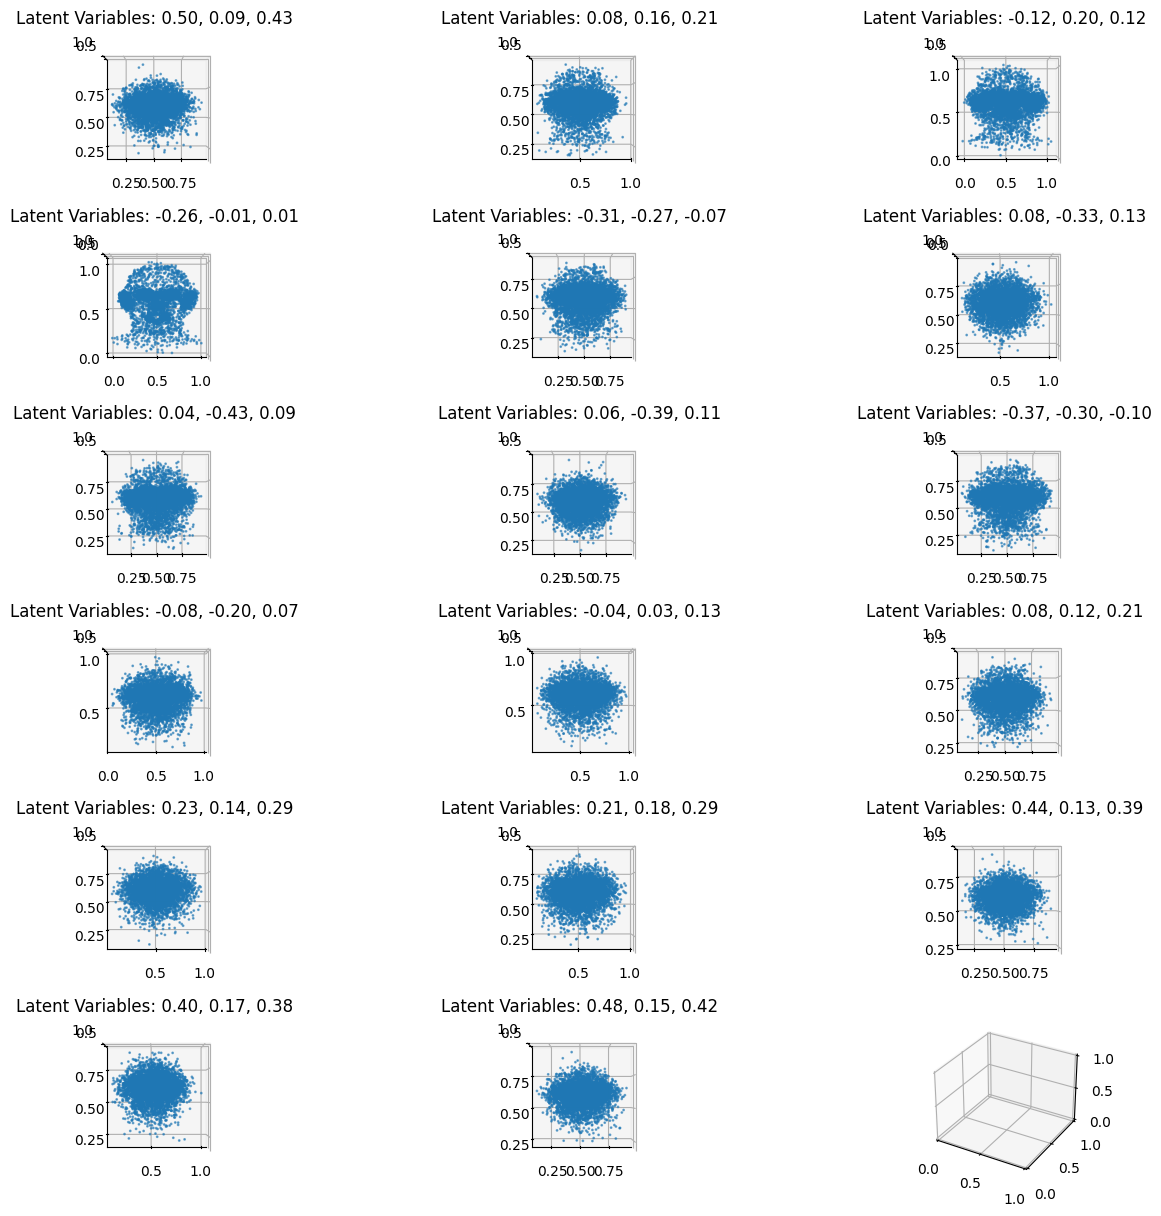

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# z_list_final.npy を読み込んで z_list に変換
z_array = np.load("z_list_final.npy")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
z_list = [torch.tensor(z_array[i], dtype=torch.float32).to(device) for i in range(z_array.shape[0])]

# 可視化用設定
num_points = 5000
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 12), subplot_kw={'projection': '3d'})
axes = axes.flatten()

# 再構成と可視化
for index, z in enumerate(z_list):
    if index >= len(axes):
        break  # 9つのプロットで終了

    # 再構築 (z を 1バッチの形に変換して decode)
    recon_batch = vae.decode(z)  # z をバッチの形状に変換
    print(recon_batch.shape)

    # CPU上で detach して numpy に変換
    # デコード結果 recon_batch: (1, num_points, 3)
    reconst_np = recon_batch.squeeze(0).cpu().detach().numpy()  # -> (num_points, 3)

    # 各軸を列インデックスで取得
    reconst_x = reconst_np[:, 0]
    reconst_y = reconst_np[:, 1]
    reconst_z = reconst_np[:, 2]

    # プロット
    axes[index].view_init(elev=90, azim=-90)
    axes[index].scatter(reconst_x, reconst_y, reconst_z, s=1, alpha=0.6)

    # 潜在変数の値をフラット化してタイトルに表示
    z_flat = z.view(-1).tolist()  # 1次元化
    z_str = ", ".join([f"{value:.2f}" for value in z_flat])
    axes[index].set_title(f"Latent Variables: {z_str}")


# 最後にプロットを表示
plt.tight_layout()
plt.show()

# 再構成誤差チェック using CD

Chamfer Distances: [0.1304856240749359, 0.10755416750907898, 0.0554184764623642, 0.03245123475790024, 0.12123317271471024, 0.12250640988349915, 0.10600312054157257, 0.13639941811561584, 0.10156616568565369, 0.11361564695835114, 0.11110533028841019, 0.12590959668159485, 0.1239987313747406, 0.1218891441822052, 0.1464623212814331, 0.12206204235553741, 0.13617677986621857]
Average Chamfer Distance: 0.11263749310198952


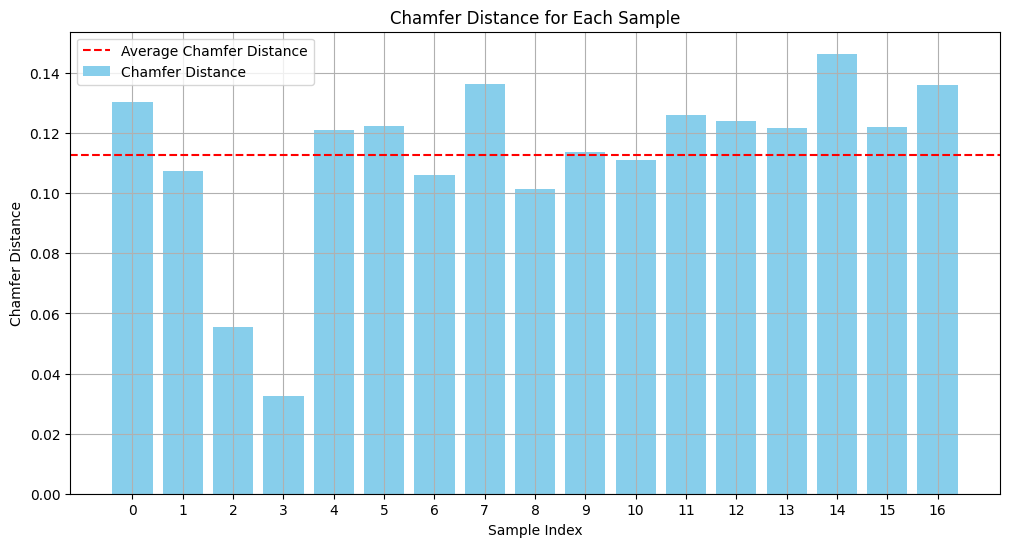

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
reconstructed_point_cloud=[]
# Chamfer Distanceの計算
chamfer_distances = []
for i, (x,) in enumerate(data_loader):
    x = x.to(device)
    x = x.squeeze(0)

    # Decode z_list[i]
    #z = torch.tensor(z_list[i]).to(device)
    recon_batch = vae.decode(z_list[i])
    # CPU上で detach して numpy に変換
    reconst_np = recon_batch.squeeze(0).cpu().detach().numpy()  # -> (num_points, 3)

    # 各軸を列インデックスで取得し、Tensor に変換
    reconst_x = torch.from_numpy(reconst_np[:, 0])
    reconst_y = torch.from_numpy(reconst_np[:, 1])
    reconst_z = torch.from_numpy(reconst_np[:, 2])

    # Tensor を stack して reconstructed_point_cloud を作成
    reconstructed_point_cloud = torch.stack([reconst_x, reconst_y, reconst_z], dim=-1).unsqueeze(0).to(device)


    # 元の点群の形状を整える
    original_point_cloud = x.reshape(1, num_points, 3).to(device)

    # カスタム関数でChamfer Distanceを計算
    loss_cd = chamfer_distance(original_point_cloud, reconstructed_point_cloud)
    chamfer_distances.append(loss_cd.item())

# Chamfer距離を出力
print("Chamfer Distances:", chamfer_distances)
average_chamfer_distance = sum(chamfer_distances) / len(chamfer_distances)
print(f"Average Chamfer Distance: {average_chamfer_distance}")

import matplotlib.pyplot as plt

# Chamfer Distancesの棒グラフをプロット
plt.figure(figsize=(12, 6))
plt.bar(range(len(chamfer_distances)), chamfer_distances, color='skyblue', label='Chamfer Distance')
plt.axhline(y=average_chamfer_distance, color='r', linestyle='--', label='Average Chamfer Distance')

# グラフの装飾
plt.title('Chamfer Distance for Each Sample')
plt.xlabel('Sample Index')
plt.ylabel('Chamfer Distance')
plt.xticks(range(len(chamfer_distances)))
plt.legend()
plt.grid(True)
plt.show()

# 再構成誤差チェック using EMD

In [ ]:
import torch
import ot  # Optimal Transportライブラリ
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# EMDの計算
emd_distances = []
reconstructed_point_cloud=[]
for i, (x,) in enumerate(data_loader):
    x = x.to(device)
    x = x.squeeze(0)

    # Decode z_list[i]
    #z = torch.tensor(z_list[i]).to(device)
    recon_batch = vae.decode(z_list[i])
    # CPU上で detach して numpy に変換
    reconst_np = recon_batch.squeeze(0).cpu().detach().numpy()  # -> (num_points, 3)

    # 各軸を列インデックスで取得し、Tensor に変換
    reconst_x = torch.from_numpy(reconst_np[:, 0])
    reconst_y = torch.from_numpy(reconst_np[:, 1])
    reconst_z = torch.from_numpy(reconst_np[:, 2])

    # Tensor を stack して reconstructed_point_cloud を作成
    reconstructed_point_cloud = torch.stack([reconst_x, reconst_y, reconst_z], dim=-1).unsqueeze(0).to(device)
    reconstructed_point_cloud = reconstructed_point_cloud.reshape(num_points, 3).to(device)


    # 元の点群の形状を整える
    original_point_cloud = x.reshape(num_points, 3).to(device)

    # カスタム関数でEMDを計算
    loss_emd = emd_distance(original_point_cloud, reconstructed_point_cloud)
    emd_distances.append(loss_emd)

# EMDの結果を出力
print("EMD Distances:", emd_distances)
average_emd_distance = sum(emd_distances) / len(emd_distances)
print(f"Average EMD Distance: {average_emd_distance}")

# EMDの棒グラフをプロット
plt.figure(figsize=(12, 6))
plt.bar(range(len(emd_distances)), emd_distances, color='lightcoral', label='EMD Distance')
plt.axhline(y=average_emd_distance, color='r', linestyle='--', label='Average EMD Distance')

# グラフの装飾
plt.title('Earth Mover’s Distance for Each Sample')
plt.xlabel('Sample Index')
plt.ylabel('EMD Distance')
plt.xticks(range(len(emd_distances)))
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()